In [99]:
import pandas as pd
import numpy as np
from plotnine import *
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

### Part 1
Find a good prediction model for the the median value of housing (MEDV) based on the datasheet

In [100]:
df = pd.read_csv("Boston.csv")
df.dropna(inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [101]:
# finding columns with 0 in them
zero_columns = df.columns[(df == 0).any()]
print(zero_columns)

Index(['ZN', 'CHAS'], dtype='object')


In [102]:
# doing log of columns with no 0 in them
df['lnCRIM'] = np.log(df['CRIM'])
df['lnINDUS'] = np.log(df['INDUS'])
df['lnNOX'] = np.log(df['NOX'])
df['lnRM'] = np.log(df['RM'])
df['lnAGE'] = np.log(df['AGE'])
df['lnDIS'] = np.log(df['DIS'])
df['lnRAD'] = np.log(df['RAD'])
df['lnTAX'] = np.log(df['TAX'])
df['lnPTRATIO'] = np.log(df['PTRATIO'])
df['lnB'] = np.log(df['B'])

In [103]:
# doing cross validation with knn model, hyperparameter tuning
scoreCV=[cross_val_score(knn(n_neighbors=i),X=df[['lnCRIM','ZN','lnINDUS','CHAS','lnNOX','lnRM','lnAGE','lnDIS','lnRAD','lnTAX','lnPTRATIO','lnB','LSTAT']],
                y=df['MEDV'],
                         cv=5).mean() for i in list(range(5, 300))]

In [104]:
df_CV=pd.DataFrame(scoreCV, columns=['scores'])
df_CV['neighbors']=list(range(5, 300))

df_CV
#What is the optimal number of neighbors
max_row = df_CV.loc[df_CV['scores'].idxmax()]
max_row

scores       0.249108
neighbors    9.000000
Name: 4, dtype: float64

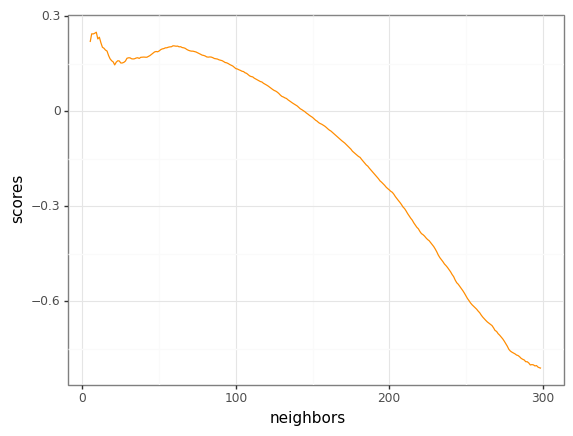

<ggplot: (8761913601232)>

In [105]:
(ggplot(df_CV, aes(x='neighbors', y='scores'))+
 geom_line(color='darkorange')+
theme_bw())

In [106]:
# trying random forest 
scoresrf=[cross_val_score(rf(n_estimators=100,max_depth=i),
                          df[['lnCRIM','ZN','lnINDUS','CHAS','lnNOX','lnRM','lnAGE','lnDIS','lnRAD','lnTAX','lnPTRATIO','lnB','LSTAT']],df['MEDV'],
                          cv=5).mean() for i in list(range(1,15))
    ]

In [107]:
rf_df=pd.DataFrame(scoresrf, columns=['scores'])

rf_df['depth']=list(range(1,15))
rf_df

,scores,depth
0,-0.021402,1
1,0.489765,2
2,0.578511,3
3,0.572935,4
4,0.563041,5
5,0.560068,6
6,0.572209,7
7,0.588934,8
8,0.573519,9
9,0.583560,10


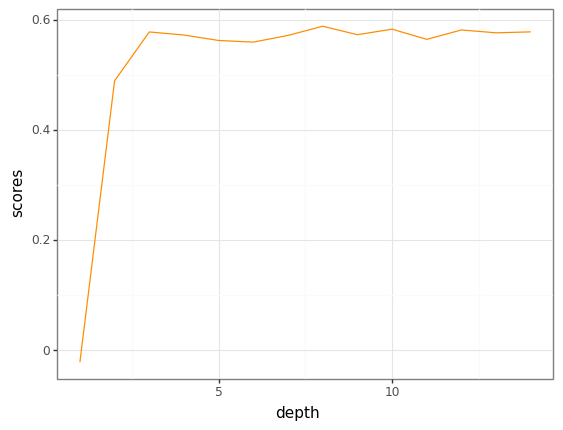

<ggplot: (8761913537515)>

In [108]:
(ggplot(rf_df, aes(x='depth', y='scores'))+
geom_line(color='darkorange')+
theme_bw())

In [109]:
#Let's find the maximum depth

rf_df.loc[rf_df['scores']==rf_df.scores.max(), 'depth']

7    8
Name: depth, dtype: int64

In [110]:
scoresrf=cross_val_score(rf(n_estimators=100,max_depth=3),
                          df[['lnCRIM','ZN','lnINDUS','CHAS','lnNOX','lnRM','lnAGE','lnDIS','lnRAD','lnTAX','lnPTRATIO','lnB','LSTAT']],df['MEDV'],
                          cv=5).mean()
scoresrf

0.5576414286162251

### Part 2
Create the best classification model you can using what we learned in class. Use any of the methods we explored and show how you assessed how good your model is carefully. Using AUC is a good idea. The label variable is "status." Hint: .data files can be read with read_csv like:

In [111]:
url = "parkinsons.data"
df = pd.read_csv(url)
df.dropna(inplace=True)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### balancing data

In [112]:
df_majority = df[df['status']==0]
df_minority = df[df['status']==1]

In [113]:
df_majority.shape

(48, 24)

In [114]:
df_minority.shape

(147, 24)

Heavily baised toward one side

In [115]:
df_majority_up = resample(df_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=147,   
                                 random_state=42)
df_majority_up.shape

(147, 24)

In [116]:
df_up=pd.concat([df_majority_up, df_minority])
df_up.shape

(294, 24)

In [117]:
feature_list = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
new_X = df_up[feature_list]
new_y = df_up['status'] 
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.20)

# Fit RandomForestClassifier and get predicted probabilities
predRF2_proba = RandomForestClassifier().fit(X_train, y_train).predict_proba(X_test)

# Round predicted probabilities to 0 or 1
predRF2 = np.where(predRF2_proba >= 0.5, 1, 0)

# Create a new DataFrame to store the results
df = X_test.copy()
df['status'] = y_test
df['predRF2'] = predRF2[:, 1]  # Update to select the second column of predRF2 (probabilities of positive class)

df.head()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status,predRF2
46,245.510,262.090,231.848,0.00235,0.00001,0.00127,0.00148,0.00380,0.01608,0.141,...,0.00476,24.602,0.467489,0.631653,-7.156076,0.127642,2.392122,0.097336,0,0
36,177.876,192.921,168.013,0.00411,0.00002,0.00233,0.00241,0.00700,0.02126,0.189,...,0.00586,23.216,0.360148,0.778834,-6.149653,0.218037,2.477082,0.165827,1,1
174,117.004,144.466,99.923,0.00353,0.00003,0.00176,0.00218,0.00528,0.01657,0.145,...,0.00590,25.445,0.387482,0.756482,-6.012559,0.229298,1.872946,0.163118,0,0
141,208.083,253.792,91.802,0.00757,0.00004,0.00428,0.00428,0.01285,0.06725,0.571,...,0.04238,15.648,0.606344,0.665945,-5.410336,0.288917,2.665133,0.231723,1,1
142,198.458,219.290,148.691,0.00376,0.00002,0.00182,0.00215,0.00546,0.03527,0.297,...,0.01728,18.702,0.606273,0.661735,-5.585259,0.310746,2.465528,0.209863,1,1


In [118]:
y_pred_rf= RandomForestClassifier().fit(X_train, y_train).predict(X_test) 

In [119]:
print(classification_report(y_pred=df['predRF2'],
                            y_true=df['status']))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.94      0.97        31

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



In [120]:
from sklearn.metrics import roc_auc_score

roc_auc_score1 = roc_auc_score(y_true=df[['status']], y_score=df[['predRF2']])

print('predRF2: ' + str(roc_auc_score1))

predRF2: 0.967741935483871


In [121]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming df is the DataFrame containing the predicted probabilities and true labels

y_proba = df['predRF2'] # Update to select the 'predRF2' column from df
fpr, tpr, threshold = roc_curve(y_test, y_proba) # Update to use y_test as true labels
auc = roc_auc_score(y_test, y_proba) # Update to use y_test as true labels

results = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'threshold': threshold})
results.head()


,fpr,tpr,threshold
0,0.0,0.000000,2
1,0.0,0.935484,1
2,1.0,1.000000,0


In [122]:
rf_acc = metrics.accuracy_score(y_test, y_pred_rf)
rf_prec = metrics.precision_score(y_test, y_pred_rf)
rf_rec = metrics.recall_score(y_test, y_pred_rf)
rf_f1 = metrics.f1_score(y_test, y_pred_rf)
y_pred_proba_rf = RandomForestClassifier(random_state=0).fit(X_train, y_train).predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_rf)
rf_auc = metrics.roc_auc_score(y_test, y_pred_proba_rf)
rf_fpr=fpr
rf_tpr=tpr
print('Accuracy:', rf_acc)
print('Precision:', rf_prec)
print('Recall:',rf_rec)
print('F1 Score:',rf_f1 )
print('AUC:', rf_auc)
print(rf_fpr)
print(rf_tpr)

Accuracy: 0.9491525423728814
Precision: 1.0
Recall: 0.9032258064516129
F1 Score: 0.9491525423728813
AUC: 1.0
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.03571429
 0.17857143 0.35714286 0.46428571 1.        ]
[0.         0.19354839 0.29032258 0.41935484 0.64516129 0.70967742
 0.74193548 0.80645161 0.83870968 0.90322581 1.         1.
 1.         1.         1.         1.        ]


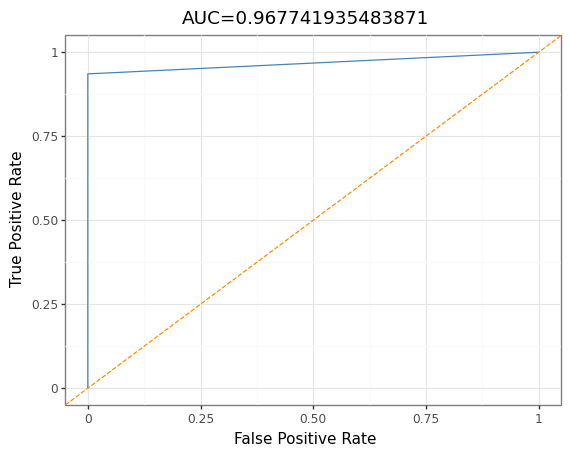

<ggplot: (8761913517529)>

In [123]:
(ggplot(data=results, mapping=aes(x='fpr', y='tpr'))+
geom_line(color='steelblue')+
ggtitle(f'AUC={auc}')+
geom_abline(linetype='dashed', color='darkorange')+
 ylab("True Positive Rate")+
 xlab("False Positive Rate")+
 theme_bw()
)

In [124]:
X = df[feature_list]
y = df['status']

In [125]:
cross_val_score(RandomForestClassifier(), X, y, scoring="roc_auc", cv = 5)

array([1.        , 0.80555556, 1.        , 0.87142857, 1.        ])

In [126]:
scoresrf=[cross_val_score(RandomForestClassifier(n_estimators=100,
                                 max_depth=i),X,y,
                          scoring="roc_auc",
                          cv=5).mean() for i in list(range(1,30))
    ]
rfdf=pd.DataFrame(scoresrf, columns=['AUC'])
rfdf['depth']=range(1,30)
rfdf

,AUC,depth
0,0.915873,1
1,0.904762,2
2,0.926984,3
3,0.910159,4
4,0.927143,5
5,0.929921,6
6,0.929921,7
7,0.916032,8
8,0.938254,9
9,0.938254,10


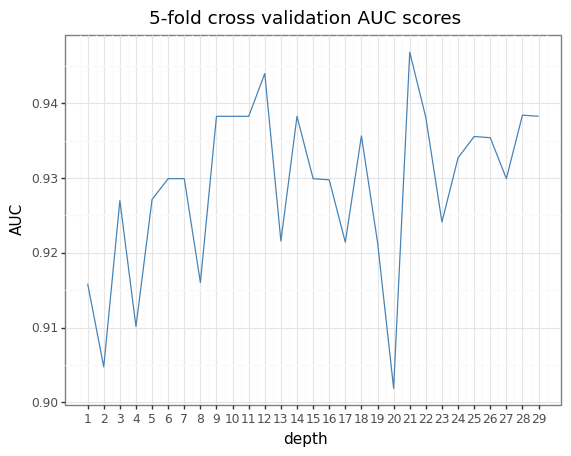

<ggplot: (8761913522240)>

In [127]:
(ggplot(data=rfdf, mapping=aes(x='depth', y='AUC'))+
       geom_line(color='steelblue')+
 scale_x_continuous(breaks=np.arange(1,30, 1))+
 ggtitle('5-fold cross validation AUC scores')+
theme_bw())

In [128]:
#Let's find the optimal  depth
rfdf.loc[rfdf['AUC']==rfdf['AUC'].max(),:]

,AUC,depth
20,0.946825,21


In [129]:
# Even though top is around twently it, around 3 is the best (given the fact we desire least amount of depth as well)
# since its accuracy jumps around the AUC value after that depth
# this turned out to receive a very high AUC score. 
# However, it is not overfitting as I split the training 
# and tested and tested it only on the testing data
rfdf.loc[rfdf['depth']==3,:]

,AUC,depth
2,0.926984,3


In [130]:
knn_max = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train).predict(X_train)
print(classification_report(y_pred = knn_max, y_true=y_train))
print(metrics.roc_auc_score(y_true=y_train,y_score=knn_max))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       119
           1       0.98      0.84      0.91       116

    accuracy                           0.91       235
   macro avg       0.92      0.91      0.91       235
weighted avg       0.92      0.91      0.91       235

0.9140104317589104


In [131]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred_k = classifier.predict(X_test)

In [132]:
knn_acc = metrics.accuracy_score(y_test, y_pred_k)
knn_prec = metrics.precision_score(y_test, y_pred_k)
knn_rec = metrics.recall_score(y_test, y_pred_k)
knn_f1 = metrics.f1_score(y_test, y_pred_k)
y_pred_proba_k = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_k)
knn_auc = metrics.roc_auc_score(y_test, y_pred_proba_k)
knn_fpr=fpr
knn_tpr=tpr
print('Accuracy:',knn_acc )
print('Precision:', knn_prec)
print('Recall:',knn_rec)
print('F1 Score:',knn_f1 )
print('AUC:', knn_auc)
print(knn_fpr)
print(knn_tpr)

Accuracy: 0.8135593220338984
Precision: 0.9545454545454546
Recall: 0.6774193548387096
F1 Score: 0.7924528301886793
AUC: 0.9285714285714286
[0.         0.         0.03571429 0.03571429 0.10714286 0.25
 1.        ]
[0.         0.41935484 0.61290323 0.67741935 0.87096774 0.93548387
 1.        ]


In [133]:
dtc = tree.DecisionTreeClassifier(random_state=0) #create decision tree modifier
dtc.fit(X_train, y_train) #train decision tree classifier
y_pred_d = dtc.predict(X_test) #predict the response for test dataset

In [134]:
dtc_acc = metrics.accuracy_score(y_test, y_pred_d)
dtc_prec = metrics.precision_score(y_test, y_pred_d)
dtc_rec = metrics.recall_score(y_test, y_pred_d)
dtc_f1 = metrics.f1_score(y_test, y_pred_d)
y_pred_proba_d = dtc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_d)
dtc_auc = metrics.roc_auc_score(y_test, y_pred_proba_d)
dtc_fpr=fpr
dtc_tpr=tpr
print('Accuracy:',dtc_acc )
print('Precision:', dtc_prec)
print('Recall:',dtc_rec)
print('F1 Score:',dtc_f1 )
print('AUC:', dtc_auc)
print(dtc_fpr)
print(dtc_tpr)

Accuracy: 0.8983050847457628
Precision: 1.0
Recall: 0.8064516129032258
F1 Score: 0.8928571428571428
AUC: 0.9032258064516129
[0. 0. 1.]
[0.         0.80645161 1.        ]


In [135]:
summary = {'Random Forest':[rf_acc,rf_prec,rf_rec,rf_f1,rf_auc],
        'Decision Tree':[dtc_acc,dtc_prec,dtc_rec,dtc_f1,dtc_auc],
        'Knn':[knn_acc,knn_prec,knn_rec,knn_f1,knn_auc]}
dfsummary = pd.DataFrame(summary, index =['Accuracy',
                                'Precision',
                                'Recall',
                                'F1 Score',
                               'AUC'])
dfsummary.head()

,Random Forest,Decision Tree,Knn
Accuracy,0.949153,0.898305,0.813559
Precision,1.000000,1.000000,0.954545
Recall,0.903226,0.806452,0.677419
F1 Score,0.949153,0.892857,0.792453
AUC,1.000000,0.903226,0.928571


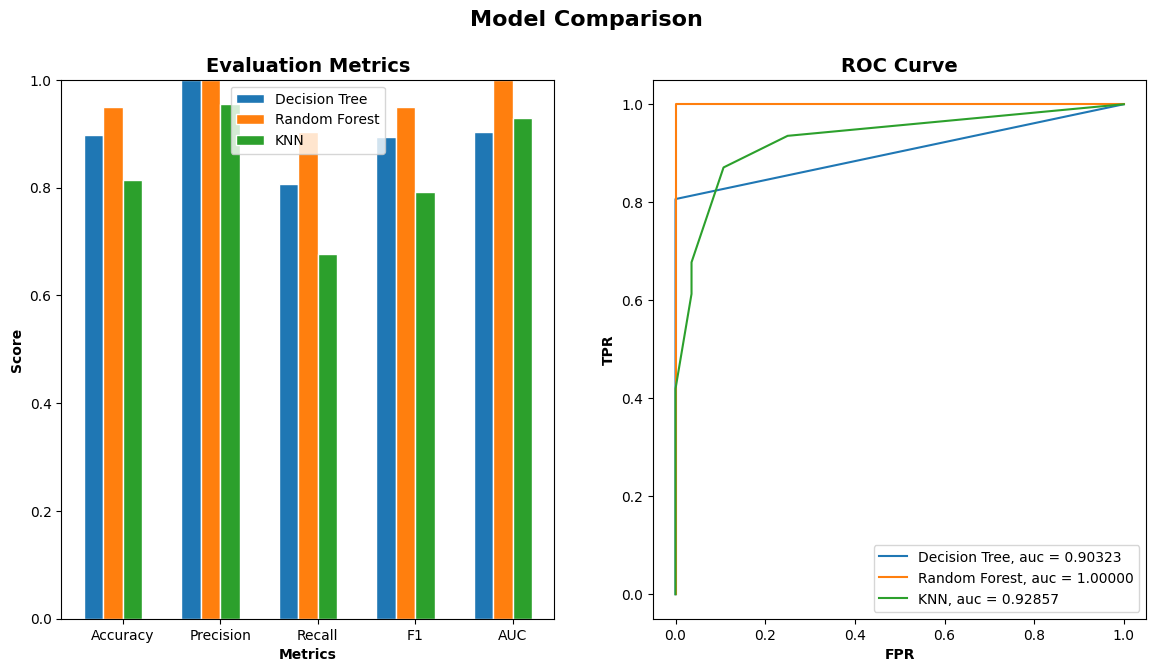

In [136]:
comp, (ax1, ax2) = plt.subplots(1, 2)
comp.suptitle('Model Comparison', fontsize=16, fontweight='bold')
comp.set_figheight(7)
comp.set_figwidth(14)
comp.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_acc,dtc_prec,dtc_rec,dtc_f1,dtc_auc]
rf_score = [rf_acc,rf_prec,rf_rec,rf_f1,rf_auc]
knn_score = [knn_acc,knn_prec,knn_rec,knn_f1,knn_auc]
## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, knn_score, width=barWidth, edgecolor='white', label='KNN')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

ax2.set_xlabel('FPR', fontweight='bold')
ax2.set_ylabel('TPR', fontweight='bold')

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

ax2.plot(dtc_fpr, dtc_tpr, label='Decision Tree, auc = {:0.5f}'.format(dtc_auc))
ax2.plot(rf_fpr,rf_tpr, label='Random Forest, auc = {:0.5f}'.format(rf_auc))
ax2.plot(knn_fpr, knn_tpr, label='KNN, auc = {:0.5f}'.format(knn_auc))

## Configure x and y axis
ax2.set_xlabel('FPR', fontweight='bold')
ax2.set_ylabel('TPR', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

### Part 3
Dataset for final project Initial ideas:  Find 2 possible open datasets (or a way to construct a dataset), and present the following:

Context of the dataset: What is interesting about the dataset? What questions could you ask that are interesting? How would you first explore the data? (No need to perform exploration at this moment)

Here are some places to find datasets:

https://www.kdnuggets.com/datasets/index.html

Methodology: How do you think you want to answer your question? 

Present links for references if available. 

In [137]:
df = pd.read_csv("ACSPUMS1Y2021_2023-04-20T161419.csv")
df.head()


,JWMNP,HINCP,AGEP,HUPAOC,NATIVITY,SEX,SCHL,PUMA,ST,Unnamed: 9
0,0,190000,45,2,1,1,23,3810,36,NaN
1,0,190000,13,2,1,2,10,3810,36,NaN
2,0,190000,10,2,1,1,6,3810,36,NaN
3,0,300000,39,4,2,1,22,3810,36,NaN
4,0,36900,83,4,1,2,22,3810,36,NaN


#### Specific variables :

HINCP - Household income (past 12 months, use ADJINC to adjust HINCP to constant dollars)

HUPAOC - HH presence and age of own children

SCHL - Educational attainment

NATIVITY - Nativity

SEX - Sex

JWMNP - Travel time to work

AGEP - Age

#### Context and methodology:

There is a great abundance of may variables on demographics, economics, employment, citizenship, education, houshold etc. we can explore any amount of problems we want

even just from my random example we could study how age, education, commute time, or having children impacts earnings. And there are still many more variables we can study

##### (honestly all the census data alone gives us much more choices than we need)

## Option2: Federal Reserve Economic Data
The U.S. federal reserve data is also avalible for download, and of course includes comprehensive data on U.S. employment, infaltion, financial markets and other such data. 

link: https://fredhelp.stlouisfed.org/fred/data/downloading/using-the-download-data-link/

In [138]:
df2 = pd.read_csv("FRED_inflation_data.csv")
#again my local directory
df2

,DATE,CPILFESL
0,1957-01-01,28.500
1,1957-02-01,28.600
2,1957-03-01,28.700
3,1957-04-01,28.800
4,1957-05-01,28.800
...,...,...
790,2022-11-01,300.261
791,2022-12-01,301.460
792,2023-01-01,302.702
793,2023-02-01,304.070


for example here is a record of monthly CPI data since 1957. 

(one issue is that to have multiple variables we will have to download seperately, then conbine them (aka copy paste in excel or something))

#### Context and methodology:

Similarly there are many questions we can study relating to the economy of the U.S. using this dataset

for example we can try and find the correlations of different economic variabels with inflation--including such as housing starts, consumer borrowing, wage growth, unemmployment etc. 